# Download indonesian stopwords

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords_indonesia = stopwords.words('indonesian')

# Tampilkan beberapa contoh stopwords bahasa Indonesia
print(stopwords_indonesia[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Removing Stop words

In [ ]:
def remove_stopwords(sentence):

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords_indonesia]
    sentence = " ".join(no_words)

    return sentence

# Function Load Dataset

In [ ]:
def load_dataset(filename, stopwords_remove):
    sentences = []
    labels = []

    with open(filename, "r") as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            sentences.append(remove_stopwords(row[0]) if stopwords_remove == True else row[0])
            labels.append(int(row[1]))

    return sentences, labels

# Load Dataset From CSV

In [ ]:
csvDataset = "Training_Dataset.csv"
csvValidation = "Validation_Dataset.csv"

train_sentences , train_labels = load_dataset(csvDataset, True)
validation_sentences, validation_labels = load_dataset(csvValidation, False)
before_train_remove, _ = load_dataset(csvDataset, False)


In [ ]:
# print(len(train_sentences))
#sample
# for i in range(10):
#     print(train_sentences[i])

sum([len(word) for word in train_sentences])


80485

Setting Utiliti Untuk Knobs

In [ ]:
vocab_size = 32000 #sesuai library bert-base-indonesian-522M
oov = "<OOV>"
padding = "post"
truncate = "post"
embedding_dim = 16
max_length = 25

num_classes = 5

# Set Up Tokenizer

In [ ]:
from transformers import BertTokenizer, TFBertModel

model_name='cahya/bert-base-indonesian-522M'
tokenizer = BertTokenizer.from_pretrained(model_name,
    model_max_length=max_length,  # Maximum length of sequences after tokenization
    padding=padding,  # Padding strategy
    truncation=truncate,  # Truncation strategy
    max_length=max_length,  # Maximum length of sequences after padding or truncation
)

model = TFBertModel.from_pretrained(model_name)
text = "Silakan diganti dengan text apa saja."
encoded_input = tokenizer(text)

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at cahya/bert-base-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#set Tokenizer
#tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov)
#Fit on texts get the word index
#tokenizer.fit_on_texts(train_sentences)
#[[x, y] for x, y in tokenizer.word_index.items()][-20:]
# print(tokenizer.word_index)

[['kue', 1182],
 ['menyesuaikan', 1183],
 ['menyempatkan', 1184],
 ['harap', 1185],
 ['prosesnya', 1186],
 ['dihargai', 1187],
 ['menolong', 1188],
 ['mengangkatnya', 1189],
 ['datang', 1190],
 ['mendatang', 1191],
 ['merelokasi', 1192],
 ['penolong', 1193],
 ['menunggu', 1194],
 ['orang', 1195],
 ['mengharapkan', 1196],
 ['berterima', 1197],
 ['kasih', 1198],
 ['dilakukan', 1199],
 ['transportasi', 1200],
 ['terlibat', 1201]]

# Sequences The dataset

In [ ]:
train_sequences = [tokenizer(sentence)['input_ids'] for sentence in train_sentences]
train_padded = np.array(pad_sequences(train_sequences, padding=padding, maxlen=max_length, truncating=truncate))

validation_sequences = [tokenizer(sentence)['input_ids'] for sentence in validation_sentences]
validation_padded = np.array(pad_sequences(validation_sequences, padding=padding, maxlen=max_length, truncating=truncate))

print(train_labels[:5])
train_labels=np.array(train_labels)
validation_labels=np.array(validation_labels)

train_labels = tf.one_hot(train_labels, depth=num_classes)
validation_labels = tf.one_hot(validation_labels, depth=num_classes)

Token indices sequence length is longer than the specified maximum sequence length for this model (28 > 25). Running this sequence through the model will result in indexing errors


[1, 0, 2, 4, 1]


In [ ]:
#train_sequences = tokenizer.texts_to_sequences(train_sentences)
#train_padded = pad_sequences(train_sequences, padding=padding, maxlen=max_length, truncating=truncate)

#validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
#validation_padded = pad_sequences(validation_sequences, padding=padding, maxlen=max_length, truncating=truncate)

#train_labels=np.array(train_labels)
#validation_labels=np.array(validation_labels)

#train_labels = tf.one_hot(train_labels, depth=num_classes)
#validation_labels = tf.one_hot(validation_labels, depth=num_classes)

# train_labels = np.expand_dims(train_labels, axis=1)
# validation_labels = np.expand_dims(validation_labels, axis=1)

AttributeError: ignored

In [ ]:
print(train_padded.shape)
print(validation_padded.shape)
print(train_labels.shape)
print(validation_labels.shape)
print(train_labels[0])

(1499, 25)
(249, 25)
(1499, 5)
(249, 5)
tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)


# Stop The callbacks When Val_Accuracy Reach 85%

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.85 and logs.get('loss') <= 0.10 and logs.get('val_loss') <= 0.10): # Experiment with changing this value
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Creating The model and Tuning The model

In [ ]:
# model = tf.keras.Sequential([
#         # tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#         # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
#         # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#         # tf.keras.layers.Flatten(),
#         # tf.keras.layers.Dense(128, activation='relu'),
#         # # tf.keras.layers.Dropout(0.2),
#         # tf.keras.layers.Dense(64, activation='relu'),
#         # #tf.keras.layers.Dropout(0.3),
#         # tf.keras.layers.Dense(5, activation='softmax')
#     ])

# model = tf.keras.Sequential([
#         tf.keras.layers.Embedding(vocab_size, embedding_dim),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.GlobalAveragePooling1D(),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(5, activation='softmax')
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(24, activation="relu"),
#     tf.keras.layers.Dense(5, activation="softmax")
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 25, 16)            512000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 10)                880       
 onal)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 513045 (1.96 MB)
Trainable params: 513045 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history = model.fit(train_padded, train_labels,epochs=40, validation_data=(validation_padded, validation_labels), callbacks=[callbacks])
#

Epoch 1/40
47/47 [==============================] - 2s 36ms/step - loss: 0.0982 - accuracy: 0.9480 - val_loss: 0.1443 - val_accuracy: 0.9759
Epoch 2/40
47/47 [==============================] - 2s 45ms/step - loss: 0.0981 - accuracy: 0.9360 - val_loss: 0.1452 - val_accuracy: 0.9759
Epoch 3/40
47/47 [==============================] - 2s 52ms/step - loss: 0.1083 - accuracy: 0.9340 - val_loss: 0.1504 - val_accuracy: 0.9759
Epoch 4/40
47/47 [==============================] - 2s 42ms/step - loss: 0.1005 - accuracy: 0.9386 - val_loss: 0.1429 - val_accuracy: 0.9719
Epoch 5/40
47/47 [==============================] - 2s 36ms/step - loss: 0.1021 - accuracy: 0.9400 - val_loss: 0.1375 - val_accuracy: 0.9719
Epoch 6/40
47/47 [==============================] - 2s 37ms/step - loss: 0.0966 - accuracy: 0.9386 - val_loss: 0.1397 - val_accuracy: 0.9759
Epoch 7/40
47/47 [==============================] - 2s 39ms/step - loss: 0.1026 - accuracy: 0.9400 - val_loss: 0.1546 - val_accuracy: 0.9719
Epoch 8/40
47

# Plot The Accuracy and validation

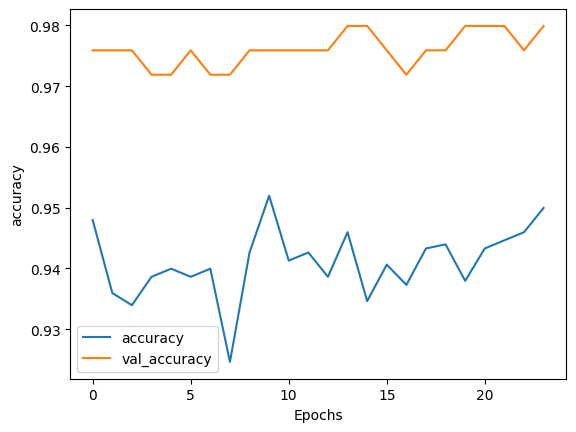

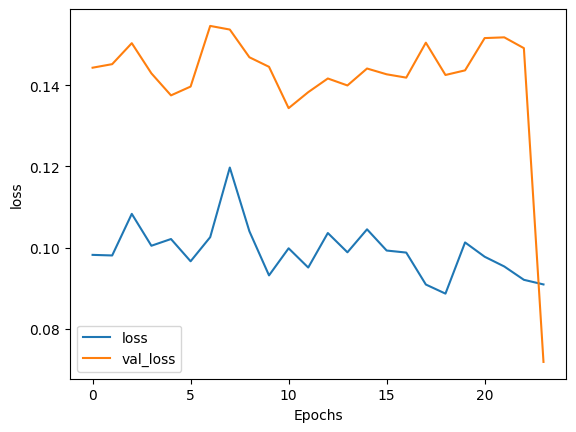

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model.save("Model_Mihu_970709.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pathlib

file_name = "saved_model_970709_mihu"

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('Model_Mihu_970709.tflite')
tflite_model_file.write_bytes(tflite_model)

2075504

In [ ]:
import shutil

# Specify the directory to be zipped
folder_to_zip = file_name  # Replace this with the path to your folder

# Specify the zip file name
zip_file_name = file_name + '.zip'

# Create a zip file
shutil.make_archive(zip_file_name[:-4], 'zip', folder_to_zip)

'/content/saved_model_9713_mihu.zip'

In [ ]:
masukan = "benarkan televisi saya rusak"

input_data = [tokenizer(masukan)['input_ids']]

input_data = pad_sequences(input_data, padding=padding, maxlen=max_length, truncating=truncate)

print(input_data)
# Prediksi
prediction = model.predict(input_data)
print(prediction)

[[   3 3444 1507 2955 3245 7312    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
1/1 [==============================] - 1s 904ms/step
[[1.0685743e-02 9.8929089e-01 9.7499685e-07 2.2440972e-05 8.4349088e-09]]


In [ ]:
#masukan = ["air mengalir pada di dinding rumah saya"]

#masukan[0] = remove_stopwords(masukan[0])

#input_data = tokenizer.texts_to_sequences(masukan)
#input_data = pad_sequences(input_data, padding=padding, maxlen=max_length, truncating=truncate)

#print(input_data)
# Prediksi
#prediction = model.predict(input_data)
#print(prediction)

[[  3 145 118  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]]
1/1 [==============================] - 0s 41ms/step
[[2.4141239e-06 3.7336578e-03 9.8077744e-01 2.7821903e-04 1.5208232e-02]]
